<a href="https://colab.research.google.com/github/devin3706/BookRecomendation/blob/main/IRWA_project_book_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Book recommender system

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
books = pd.read_csv('https://raw.githubusercontent.com/devin3706/BookRecomendation/refs/heads/main/data_sets/BX-Books.csv', sep=';', on_bad_lines='skip', encoding = 'latin-1')

<ipython-input-71-9da7a32ae124>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('https://raw.githubusercontent.com/devin3706/BookRecomendation/refs/heads/main/data_sets/BX-Books.csv', sep=';', on_bad_lines='skip', encoding = 'latin-1')


In [72]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [73]:
books.shape

(271360, 8)

In [74]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [75]:
#keeping the needed columns
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L']]

In [76]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [77]:
#renaming columns
books.rename(columns = {
    'Book-Title' :'title',
    'Book-Author' : 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-L':'img_url'}, inplace = True)

<ipython-input-77-2bd844a07135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books.rename(columns = {


In [78]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [79]:
#importing users data
users = pd.read_csv('https://raw.githubusercontent.com/devin3706/BookRecomendation/refs/heads/main/data_sets/BX-Users.csv', sep=';', on_bad_lines='skip', encoding = 'latin-1')

In [80]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [81]:
users.shape

(278858, 3)

In [82]:
#importing ratings-data related to books
ratings = pd.read_csv('https://raw.githubusercontent.com/devin3706/BookRecomendation/refs/heads/main/data_sets/BX-Book-Ratings.csv', sep=';', on_bad_lines='skip', encoding = 'latin-1')

In [83]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [84]:
ratings.shape

(1149780, 3)

In [85]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [86]:
ratings.rename(columns={
    'User-ID':'user_id',
    'Book-Rating':'rating'},inplace = True)


In [87]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [88]:
ratings['user_id'].value_counts()
#user-id 11676 has read 13602 books

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [89]:
ratings['user_id'].unique().shape

(105283,)

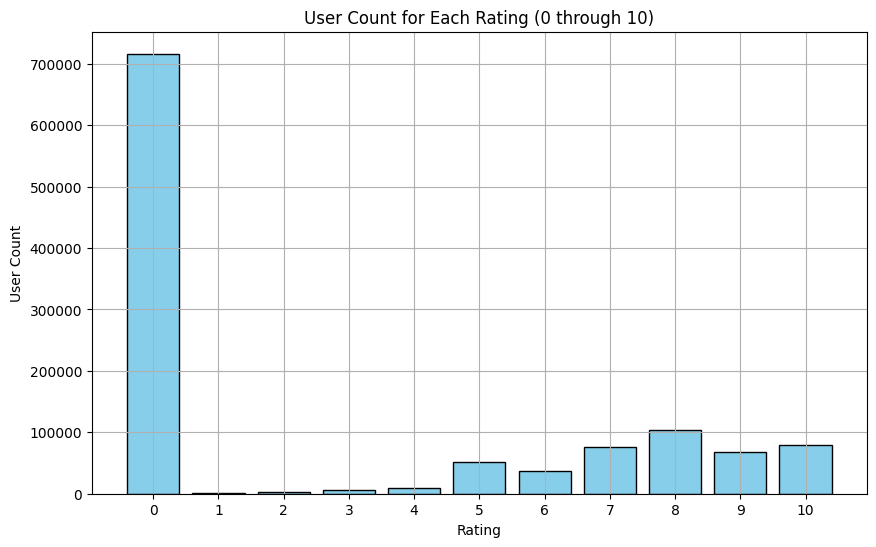

In [90]:
rating_count = ratings.groupby('rating')['user_id'].count().reset_index()

# Rename the columns for clarity
rating_count.columns = ['rating', 'user_count']

# Plot the distribution of user count for each rating
plt.figure(figsize=(10, 6))
plt.bar(rating_count['rating'], rating_count['user_count'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('User Count for Each Rating (0 through 10)')
plt.xlabel('Rating')
plt.ylabel('User Count')
plt.xticks(range(11))  # Ensure the x-axis shows ratings from 0 to 10
plt.grid(True)

# Show the plot
plt.show()

In [92]:
#filtering out users who has read morethan 200 books
x = ratings['user_id'].value_counts() > 200
x[x].shape

(899,)

In [49]:
y = x[x].index
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [50]:
ratings = ratings[ratings['user_id'].isin(y)]

In [51]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [52]:
ratings.shape

(526356, 3)

In [53]:
ratings_with_books = ratings.merge(books, on = 'ISBN' )

In [54]:
ratings_with_books

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...
487666,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487667,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487668,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...
487669,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...


In [55]:
ratings_with_books.shape

(487671, 8)

In [56]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [57]:
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [58]:
num_rating.rename(columns ={
    'rating':'noof_ratings'
}, inplace = True)

In [59]:
num_rating.head()

,title,noof_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [60]:
final_rating = ratings_with_books.merge(num_rating, on= 'title')
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,img_url,noof_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7


In [61]:
#filetring out books with morethan 50 rating
final_rating = final_rating[final_rating['noof_ratings']>=50]
final_rating

,user_id,ISBN,rating,title,author,year,publisher,img_url,noof_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79
...,...,...,...,...,...,...,...,...,...
487505,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,84
487506,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,60
487579,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,59
487618,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,146


In [64]:
final_rating['title'].unique().shape

(742,)

<ipython-input-99-10c6f5d7d0d8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='rating', data=book_slice, palette="viridis", ax=axs[i])
<ipython-input-99-10c6f5d7d0d8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='rating', data=book_slice, palette="viridis", ax=axs[i])
<ipython-input-99-10c6f5d7d0d8>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='rating', data=book_slice, palette="viridis", ax=axs[i])
<ipython-input-99-10c6f5d7d0d8>:21: FutureWarning: 

Passing `palette` without assigning `h

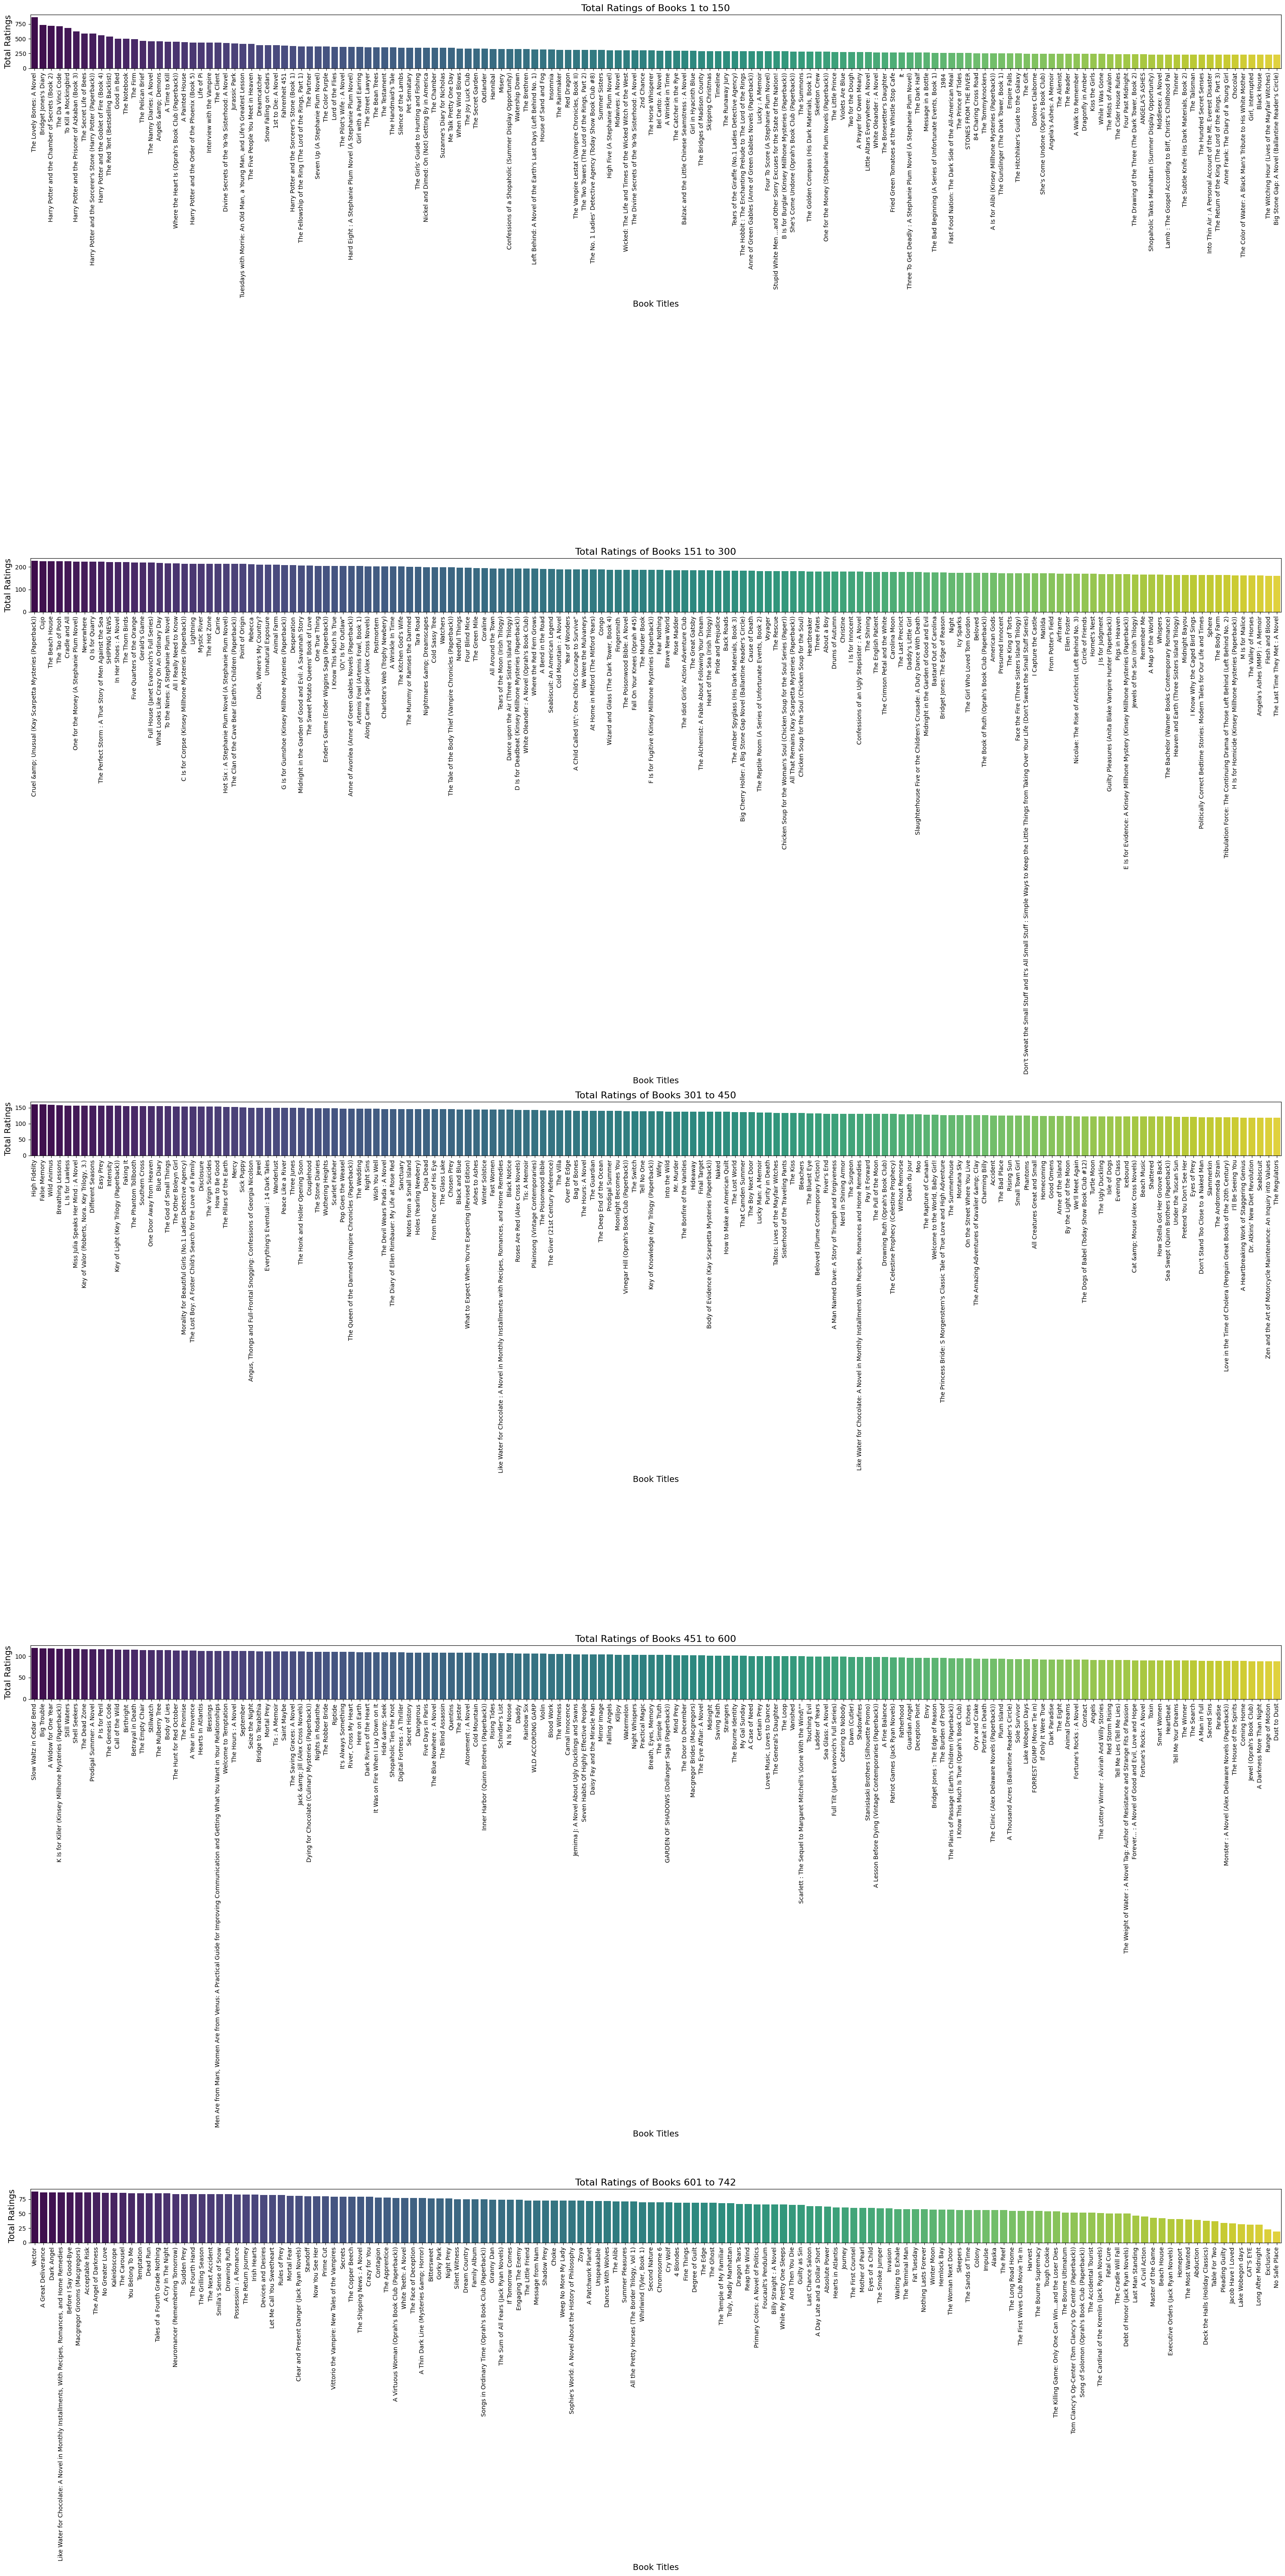

In [99]:
# Group by book titles and calculate the total ratings for each book
book_ratings = final_rating.groupby('title')['rating'].sum().reset_index()

# Sort the books based on total ratings
book_ratings = book_ratings.sort_values(by='rating', ascending=False)

# Set up the figure for 4 subplots in a row-wise layout
fig, axs = plt.subplots(5, 1, figsize=(30, 60))  # 4 rows, 1 column

# Define the number of books per subplot
books_per_subplot = 150

# Loop to create 4 subplots
for i in range(5):
    # Select the slice of data for each subplot
    start_idx = i * books_per_subplot
    end_idx = (i + 1) * books_per_subplot
    book_slice = book_ratings[start_idx:end_idx]

    # Plot on the current axis
    sns.barplot(x='title', y='rating', data=book_slice, palette="viridis", ax=axs[i])

    if i == 4:
      end_idx = 742

    # Customize the subplot
    axs[i].set_title(f'Total Ratings of Books {start_idx + 1} to {end_idx}', fontsize=16)
    axs[i].set_xlabel('Book Titles', fontsize=14)
    axs[i].set_ylabel('Total Ratings', fontsize=14)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
final_rating.sample(10)

,user_id,ISBN,rating,title,author,year,publisher,img_url,noof_ratings
309067,179772,0385511612,0,Bleachers,John Grisham,2003,Doubleday,http://images.amazon.com/images/P/0385511612.0...,53
281300,165308,0373484224,8,Stanislaski Brothers (Silhouette Promo),Nora Roberts,2000,Silhouette,http://images.amazon.com/images/P/0373484224.0...,52
177112,101305,0553273914,7,The House of the Spirits,Isabel Allende,1986,Bantam Books,http://images.amazon.com/images/P/0553273914.0...,68
477258,268932,0385335881,0,Shopaholic Takes Manhattan (Summer Display Opp...,Sophie Kinsella,2002,Delta,http://images.amazon.com/images/P/0385335881.0...,78
12329,8067,0385472951,10,The Partner,John Grisham,1997,Doubleday Books,http://images.amazon.com/images/P/0385472951.0...,159
154459,89602,0156028778,7,The Crimson Petal and the White,Michel Faber,2003,Harvest Books,http://images.amazon.com/images/P/0156028778.0...,98
119634,69355,0345444884,9,The Talisman,STEPHEN KING,2001,Ballantine Books,http://images.amazon.com/images/P/0345444884.0...,84
19308,11676,0425116840,0,The Cardinal of the Kremlin (Jack Ryan Novels),Tom Clancy,1989,Berkley Publishing Group,http://images.amazon.com/images/P/0425116840.0...,67
209797,123883,0399149848,5,Birthright,Nora Roberts,2003,Putnam Publishing Group,http://images.amazon.com/images/P/0399149848.0...,52
37425,16916,0440193613,0,Wanderlust,Danielle Steel,1987,Dell,http://images.amazon.com/images/P/0440193613.0...,81


In [ ]:
final_rating.shape

(61853, 9)

In [ ]:
#removing duplicates
final_rating.drop_duplicates(['title','user_id'], inplace =True)

In [ ]:
final_rating.shape

(59850, 9)

In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,img_url,noof_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79
...,...,...,...,...,...,...,...,...,...
487505,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,84
487506,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,60
487579,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,59
487618,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,146


In [ ]:
#checking for null values
final_rating.isnull().sum()

,0
user_id,0
ISBN,0
rating,0
title,0
author,0
year,0
publisher,0
img_url,0
noof_ratings,0


In [ ]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.shape

(742, 888)

In [ ]:
book_pivot.fillna(0, inplace= True)

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
book_sparse = csr_matrix(book_pivot)
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14961 stored elements in Compressed Sparse Row format>

In [ ]:
import sklearn
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')


In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distance,suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [ ]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [ ]:
suggestion

array([[237, 238, 240, 241, 184, 536]])

In [ ]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [ ]:
book_pivot.index[3]

'4 Blondes'

In [ ]:
books_name = book_pivot.index

In [ ]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [ ]:
import os
import pickle

os.makedirs('artifacts', exist_ok=True)

pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(books_name, open('artifacts/books_name.pkl', 'wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

In [ ]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance,suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [ ]:
book_name ='No Safe Place'
recommend_book(book_name)

No Safe Place
Long After Midnight
Exclusive
Table For Two
Lake Wobegon days
A Civil Action


In [ ]:
book_name ='Harry Potter and the Chamber of Secrets (Book 2)'
recommend_book(book_name)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall
